In [101]:
using XLSX
using DataFrames, TimeSeries
using StatsPlots
using Plots
using LinearAlgebra
using CSV
using StatsBase
using GLM
include("../utils.jl")


print_percentiles (generic function with 3 methods)

In [102]:
columns = [:Date, :USA_Net, :World_ex_USA, :EM_Net, :ACWI_Net_PLN, :MwigTR, :WIG20TR, :B10YPL]
data_df = DataFrame(XLSX.readtable("../data/assets_data_03.24.xlsx", "Indexes_PLN"; infer_eltypes=true))[2:end, columns]
dropmissing!(data_df, disallowmissing=true)
returns_pln = data_df |> 
            x -> TimeArray(x; timestamp = :Date) |> 
            x -> from(x, Date(2002,12,01)) |>
            x -> percentchange(x, :log)

255×7 TimeArray{Float64, 2, Date, Matrix{Float64}} 2003-01-31 to 2024-03-31
┌────────────┬────────────┬──────────────┬─────────────┬──────────────┬─────────
│            │ USA_Net    │ World_ex_USA │ EM_Net      │ ACWI_Net_PLN │ MwigTR ⋯
├────────────┼────────────┼──────────────┼─────────────┼──────────────┼─────────
│ 2003-01-31 │ -0.0248446 │   -0.0388471 │ -0.00442015 │   -0.0317079 │  -0.04 ⋯
│ 2003-02-28 │ -0.0159343 │   -0.0199094 │  -0.0284988 │   0.00510351 │ -0.001 ⋯
│ 2003-03-31 │ 0.00886423 │   -0.0194601 │  -0.0289739 │    0.0430687 │  -0.00 ⋯
│ 2003-04-30 │  0.0798764 │    0.0916379 │   0.0851925 │    0.0118412 │   0.03 ⋯
│ 2003-05-31 │  0.0517369 │    0.0601744 │   0.0690563 │    0.0300993 │   0.05 ⋯
│ 2003-06-30 │   0.011892 │    0.0240024 │   0.0551391 │    0.0670022 │   0.01 ⋯
│ 2003-07-31 │  0.0179915 │    0.0226828 │   0.0603263 │    0.0132941 │    0.1 ⋯
│ 2003-08-31 │  0.0181089 │    0.0254588 │   0.0647735 │    0.0495565 │    0.1 ⋯
│     ⋮      │     ⋮      │      

In [105]:
data_df = DataFrame(XLSX.readtable("../data/assets_data_03.24.xlsx", "Macro_month"; infer_eltypes=true))[:,[:Date, :WIBOR3m, :CPIPLY, :Y10PL, :MWig40_dy]]
dropmissing!(data_df, disallowmissing=true)
macro_pl = data_df |> x -> TimeArray(x; timestamp = :Date)  |> x -> from(x,Date(2003,01,01)) 

204×4 TimeArray{Float64, 2, Date, Matrix{Float64}} 2007-08-31 to 2024-07-31
┌────────────┬─────────┬────────┬─────────┬───────────┐
│            │ WIBOR3m │ CPIPLY │ Y10PL   │ MWig40_dy │
├────────────┼─────────┼────────┼─────────┼───────────┤
│ 2007-08-31 │  0.0503 │  0.015 │ 0.05789 │   0.00668 │
│ 2007-09-30 │   0.051 │  0.023 │   0.057 │   0.00778 │
│ 2007-10-31 │  0.0521 │   0.03 │ 0.05514 │   0.00775 │
│ 2007-11-30 │  0.0556 │  0.036 │ 0.05777 │    0.0093 │
│ 2007-12-31 │   0.057 │   0.04 │ 0.05916 │    0.0095 │
│ 2008-01-31 │  0.0565 │   0.04 │ 0.05688 │     0.011 │
│ 2008-02-29 │  0.0594 │  0.042 │ 0.05973 │    0.0118 │
│ 2008-03-31 │  0.0615 │  0.041 │ 0.05971 │    0.0188 │
│     ⋮      │    ⋮    │   ⋮    │    ⋮    │     ⋮     │
│ 2024-01-31 │  0.0586 │  0.039 │ 0.05226 │   0.02643 │
│ 2024-02-29 │  0.0586 │  0.028 │ 0.05312 │   0.03451 │
│ 2024-03-31 │  0.0588 │   0.02 │ 0.05432 │   0.03081 │
│ 2024-04-30 │  0.0586 │  0.024 │ 0.05712 │   0.03272 │
│ 2024-05-31 │  0.0585 │  0.

In [104]:
columns = [:Date, :USA_Net, :World_ex_USA, :EM_Net]
data_df = DataFrame(XLSX.readtable("../data/assets_data_03.24.xlsx", "Indexes"; infer_eltypes=true))[2:end, columns]
dropmissing!(data_df, disallowmissing=true)
returns_usd = data_df |> 
            x -> TimeArray(x; timestamp = :Date) |> 
            x -> percentchange(x, :log)

435×3 TimeArray{Float64, 2, Date, Matrix{Float64}} 1988-01-31 to 2024-03-31
┌────────────┬────────────┬──────────────┬─────────────┐
│            │ USA_Net    │ World_ex_USA │ EM_Net      │
├────────────┼────────────┼──────────────┼─────────────┤
│ 1988-01-31 │  0.0410122 │    0.0153553 │   0.0935834 │
│ 1988-02-29 │  0.0401109 │    0.0640862 │   0.0031132 │
│ 1988-03-31 │ -0.0349774 │    0.0592025 │     0.10175 │
│ 1988-04-30 │ 0.00818061 │    0.0140195 │   0.0517417 │
│ 1988-05-31 │ 0.00760205 │   -0.0326806 │   0.0292525 │
│ 1988-06-30 │  0.0445733 │   -0.0229028 │   0.0331365 │
│ 1988-07-31 │ -0.0040323 │    0.0288082 │  -0.0260317 │
│ 1988-08-31 │  -0.035096 │   -0.0667177 │  -0.0274362 │
│     ⋮      │     ⋮      │      ⋮       │      ⋮      │
│ 2023-09-30 │ -0.0483353 │   -0.0342956 │  -0.0264995 │
│ 2023-10-31 │ -0.0235616 │   -0.0431263 │   -0.039629 │
│ 2023-11-30 │  0.0895259 │    0.0898198 │   0.0769883 │
│ 2023-12-31 │  0.0456572 │    0.0532219 │   0.0383487 │
│ 2024-01-31

In [62]:
returns_summarystats(returns_pln, 12)

,std,max,mean,p75th,min,skewness,p25th,autocor,kurtosis,sr,median
USA_Net,0.1494,1.4788,0.0985,0.4065,-2.257,-0.7909,-0.1905,0.0391,1.8967,0.6593,0.1537
World_ex_USA,0.168,1.7129,0.0702,0.3971,-2.7986,-0.8513,-0.2294,0.1307,2.6166,0.4181,0.1466
EM_Net,0.2087,1.893,0.0842,0.553,-3.8371,-0.8236,-0.3169,0.1393,3.2059,0.4033,0.0995
ACWI_Net_PLN,0.121,1.2714,0.0879,0.3596,-1.2476,-0.3241,-0.1698,0.0111,0.6767,0.7263,0.0957
MwigTR,0.2181,2.403,0.1155,0.4835,-3.8898,-0.6628,-0.2993,0.1952,3.7443,0.5296,0.1475
WIG20TR,0.2199,2.2594,0.0705,0.594,-3.2019,-0.3645,-0.4047,0.0087,1.0945,0.3205,0.1144
B10YPL,0.0895,1.5024,0.0444,0.206,-1.0138,0.0388,-0.1158,0.0204,3.1919,0.4963,0.0604


In [38]:
returns_summarystats(returns_usd,12)

,std,max,mean,p75th,min,skewness,p25th,autocor,kurtosis,sr,median
USA_Net,0.1491,1.4788,0.1,0.4254,-2.257,-0.7009,-0.2004,0.0014,1.3793,0.6706,0.1537
World_ex_USA,0.1682,1.7129,0.0543,0.4165,-2.7986,-0.6171,-0.2752,0.0571,1.6003,0.323,0.0992
EM_Net,0.2239,2.0825,0.0877,0.5565,-4.1,-0.8932,-0.3138,0.1422,3.1066,0.3914,0.1224


In [39]:
ols = lm(@formula(USA_Net ~ MwigTR), returns_pln)
println(ols)
println(r2(ols))

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

USA_Net ~ 1 + MwigTR

Coefficients:
──────────────────────────────────────────────────────────────────────────────
                  Coef.  Std. Error      t  Pr(>|t|)     Lower 95%   Upper 95%
──────────────────────────────────────────────────────────────────────────────
(Intercept)  0.00370211  0.00199595   1.85    0.0648  -0.000228753  0.00763297
MwigTR       0.470608    0.031373    15.00    <1e-36   0.408822     0.532395
──────────────────────────────────────────────────────────────────────────────
0.47171242027894034


In [47]:
ols = lm(@formula(MwigTR ~ USA_Net), returns_pln)
println(ols)
println(r2(ols))

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

MwigTR ~ 1 + USA_Net

Coefficients:
─────────────────────────────────────────────────────────────────────────────
                  Coef.  Std. Error      t  Pr(>|t|)    Lower 95%   Upper 95%
─────────────────────────────────────────────────────────────────────────────
(Intercept)  0.00149191  0.00293123   0.51    0.6112  -0.00428091  0.00726474
USA_Net      1.00235     0.0668212   15.00    <1e-36   0.870747    1.13395
─────────────────────────────────────────────────────────────────────────────
0.47171242027894


In [114]:
returns_lag = merge(returns_pln, TimeSeries.lead(returns_pln,1))
ols = lm(@formula(MwigTR ~  USA_Net_1 + USA_Net), returns_lag)
println(ols)
println(r2(ols))

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

MwigTR ~ 1 + USA_Net_1 + USA_Net

Coefficients:
──────────────────────────────────────────────────────────────────────────────
                   Coef.  Std. Error      t  Pr(>|t|)    Lower 95%   Upper 95%
──────────────────────────────────────────────────────────────────────────────
(Intercept)  0.000574091  0.00296783   0.19    0.8468  -0.00527092  0.00641911
USA_Net_1    0.10924      0.0666639    1.64    0.1025  -0.0220515   0.240532
USA_Net      1.00065      0.0666232   15.02    <1e-36   0.869436    1.13186
──────────────────────────────────────────────────────────────────────────────
0.47876745733429493


In [54]:
ols = lm(@formula(World_ex_USA ~ MwigTR), returns_pln)
println(ols)
println(r2(ols))

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

World_ex_USA ~ 1 + MwigTR

Coefficients:
──────────────────────────────────────────────────────────────────────────────
                   Coef.  Std. Error      t  Pr(>|t|)    Lower 95%   Upper 95%
──────────────────────────────────────────────────────────────────────────────
(Intercept)  0.000668284  0.00218435   0.31    0.7599  -0.00363363  0.00497019
MwigTR       0.544382     0.0343344   15.86    <1e-39   0.476763    0.612001
──────────────────────────────────────────────────────────────────────────────
0.4993949288596782


In [55]:
ols = lm(@formula(EM_Net ~ MwigTR), returns_pln)
println(ols)
println(r2(ols))

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

EM_Net ~ 1 + MwigTR

Coefficients:
─────────────────────────────────────────────────────────────────────────────
                   Coef.  Std. Error      t  Pr(>|t|)   Lower 95%   Upper 95%
─────────────────────────────────────────────────────────────────────────────
(Intercept)  0.000866209  0.00289832   0.30    0.7653  -0.0048418  0.00657422
MwigTR       0.628798     0.0455567   13.80    <1e-31   0.539077   0.718518
─────────────────────────────────────────────────────────────────────────────
0.43052065797049277


In [56]:
columns = [:Date, :USA_Net, :World_ex_USA, :EM_Net]
data_df = DataFrame(XLSX.readtable("../data/assets_data_03.24.xlsx", "Indexes"; infer_eltypes=true))[2:end, columns]
dropmissing!(data_df, disallowmissing=true)
returns_usd = data_df |> 
            x -> TimeArray(x; timestamp = :Date) |> 
            x -> percentchange(x, :log)

435×3 TimeArray{Float64, 2, Date, Matrix{Float64}} 1988-01-31 to 2024-03-31
┌────────────┬────────────┬──────────────┬─────────────┐
│            │ USA_Net    │ World_ex_USA │ EM_Net      │
├────────────┼────────────┼──────────────┼─────────────┤
│ 1988-01-31 │  0.0410122 │    0.0153553 │   0.0935834 │
│ 1988-02-29 │  0.0401109 │    0.0640862 │   0.0031132 │
│ 1988-03-31 │ -0.0349774 │    0.0592025 │     0.10175 │
│ 1988-04-30 │ 0.00818061 │    0.0140195 │   0.0517417 │
│ 1988-05-31 │ 0.00760205 │   -0.0326806 │   0.0292525 │
│ 1988-06-30 │  0.0445733 │   -0.0229028 │   0.0331365 │
│ 1988-07-31 │ -0.0040323 │    0.0288082 │  -0.0260317 │
│ 1988-08-31 │  -0.035096 │   -0.0667177 │  -0.0274362 │
│     ⋮      │     ⋮      │      ⋮       │      ⋮      │
│ 2023-09-30 │ -0.0483353 │   -0.0342956 │  -0.0264995 │
│ 2023-10-31 │ -0.0235616 │   -0.0431263 │   -0.039629 │
│ 2023-11-30 │  0.0895259 │    0.0898198 │   0.0769883 │
│ 2023-12-31 │  0.0456572 │    0.0532219 │   0.0383487 │
│ 2024-01-31

In [57]:
data = merge(returns_pln[:MwigTR], returns_usd[:USA_Net])
ols = lm(@formula(USA_Net ~ MwigTR), data)
println(ols)
println(r2(ols))

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

USA_Net ~ 1 + MwigTR

Coefficients:
──────────────────────────────────────────────────────────────────────────────
                  Coef.  Std. Error      t  Pr(>|t|)     Lower 95%   Upper 95%
──────────────────────────────────────────────────────────────────────────────
(Intercept)  0.00370211  0.00199595   1.85    0.0648  -0.000228753  0.00763297
MwigTR       0.470608    0.031373    15.00    <1e-36   0.408822     0.532395
──────────────────────────────────────────────────────────────────────────────
0.4717124202789381


In [58]:
# number of month wig20 > mwig40

n_wig20Gr = values(returns_pln[:WIG20TR] .> returns_pln[:MwigTR])  |> count
n_wig20Gr / length(returns_pln)


0.47244094488188976

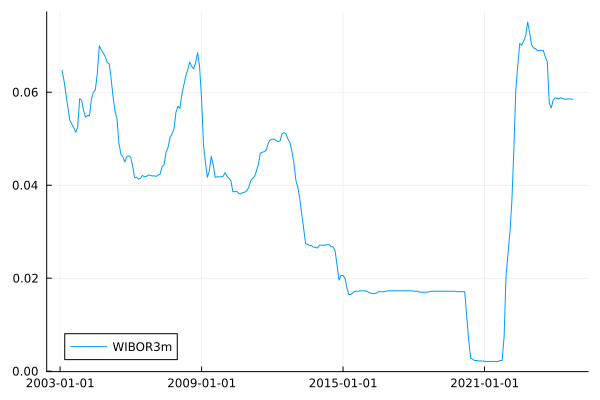

In [97]:
plot(rf)

In [100]:
bond_excess = returns_pln[:B10YPL] .- rf ./ 23 |>
    x -> from(x, Date(2015,01,01)) |>
    x -> to(x,  Date(2019,12,31)) 

returns_summarystats(bond_excess,12)

,std,max,mean,p75th,min,skewness,p25th,autocor,kurtosis,sr,median
B10YPL_WIBOR3m,0.0605,0.5817,0.0274,0.1466,-0.5147,-0.0055,-0.1419,0.1196,0.0534,0.4531,0.0524


In [129]:
variables= merge(returns_pln[:USA_Net, :MwigTR], TimeSeries.lead(returns_pln[:USA_Net, :MwigTR]), macro_pl[:WIBOR3m, :CPIPLY, :MWig40_dy], TimeSeries.lead(macro_pl[:WIBOR3m, :CPIPLY, :MWig40_dy], 1), log.(TimeSeries.lead(macro_pl[:MWig40_dy],1)))
colnames(variables)

11-element Vector{Symbol}:
 :USA_Net
 :MwigTR
 :USA_Net_1
 :MwigTR_1
 :WIBOR3m
 :CPIPLY
 :MWig40_dy
 :WIBOR3m_1
 :CPIPLY_1
 :MWig40_dy_1
 :MWig40_dy_2

In [120]:
ols = lm(@formula(MwigTR ~ MWig40_dy_1), variables)
println(ols)
println(r2(ols))

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

MwigTR ~ 1 + MWig40_dy_1

Coefficients:
────────────────────────────────────────────────────────────────────────────
                  Coef.  Std. Error      t  Pr(>|t|)    Lower 95%  Upper 95%
────────────────────────────────────────────────────────────────────────────
(Intercept)   0.0155487  0.00976199   1.59    0.1128  -0.00370211  0.0347995
MWig40_dy_1  -0.537232   0.384082    -1.40    0.1635  -1.29465     0.220185
────────────────────────────────────────────────────────────────────────────
0.00978451741140185


In [128]:
ols = lm(@formula(MwigTR ~ MWig40_dy_2), variables)
println(ols)
println(r2(ols))

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

MwigTR ~ 1 + MWig40_dy_2

Coefficients:
─────────────────────────────────────────────────────────────────────────────
                  Coef.  Std. Error      t  Pr(>|t|)   Lower 95%    Upper 95%
─────────────────────────────────────────────────────────────────────────────
(Intercept)  -0.0510792  0.0298158   -1.71    0.0882  -0.109877   0.00771809
MWig40_dy_2  -0.0138427  0.00750774  -1.84    0.0667  -0.0286481  0.000962711
─────────────────────────────────────────────────────────────────────────────
0.01687965863729679


In [123]:
ols = lm(@formula(MwigTR ~ MWig40_dy_1 + WIBOR3m_1 + CPIPLY_1), variables)
println(ols)
println(r2(ols))

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

MwigTR ~ 1 + MWig40_dy_1 + WIBOR3m_1 + CPIPLY_1

Coefficients:
───────────────────────────────────────────────────────────────────────────
                  Coef.  Std. Error      t  Pr(>|t|)   Lower 95%  Upper 95%
───────────────────────────────────────────────────────────────────────────
(Intercept)   0.0353501   0.0123444   2.86    0.0046   0.0110053   0.059695
MWig40_dy_1  -0.64955     0.385484   -1.69    0.0936  -1.40978     0.110679
WIBOR3m_1    -0.705224    0.273094   -2.58    0.0105  -1.2438     -0.166644
CPIPLY_1      0.176685    0.135657    1.30    0.1943  -0.0908499   0.444221
───────────────────────────────────────────────────────────────────────────
0.04328380020110667


In [124]:
ols = lm(@formula(MwigTR ~ MWig40_dy + WIBOR3m + CPIPLY), variables)
println(ols)
println(r2(ols))

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

MwigTR ~ 1 + MWig40_dy + WIBOR3m + CPIPLY

Coefficients:
─────────────────────────────────────────────────────────────────────────────
                  Coef.  Std. Error      t  Pr(>|t|)    Lower 95%   Upper 95%
─────────────────────────────────────────────────────────────────────────────
(Intercept)   0.0291082   0.0124269   2.34    0.0202   0.00460065   0.0536157
MWig40_dy    -0.354493    0.386771   -0.92    0.3605  -1.11726      0.408273
WIBOR3m      -0.731823    0.27549    -2.66    0.0085  -1.27513     -0.188517
CPIPLY        0.186271    0.136519    1.36    0.1740  -0.0829644    0.455507
─────────────────────────────────────────────────────────────────────────────
0.03722238908215714


In [135]:
ols = lm(@formula(MwigTR ~ USA_Net_1 + MwigTR_1 + MWig40_dy_2 + WIBOR3m_1 + CPIPLY_1), variables)
println(ols)
println(r2(ols))

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

MwigTR ~ 1 + USA_Net_1 + MwigTR_1 + MWig40_dy_2 + WIBOR3m_1 + CPIPLY_1

Coefficients:
──────────────────────────────────────────────────────────────────────────────
                  Coef.  Std. Error      t  Pr(>|t|)   Lower 95%     Upper 95%
──────────────────────────────────────────────────────────────────────────────
(Intercept)  -0.0438455  0.0305371   -1.44    0.1527  -0.104075    0.0163837
USA_Net_1    -0.0252262  0.139609    -0.18    0.8568  -0.300582    0.250129
MwigTR_1      0.160473   0.107605     1.49    0.1375  -0.0517588   0.372705
MWig40_dy_2  -0.0158621  0.00765439  -2.07    0.0396  -0.0309591  -0.000765107
WIBOR3m_1    -0.671375   0.280335    -2.39    0.0176  -1.22429    -0.11846
CPIPLY_1      0.186764   0.137519     1.36    0.1760  -0.0844682   0.457997
───────────────────────────────────────

In [136]:
ols = lm(@formula(MwigTR ~ USA_Net + MwigTR_1 + MWig40_dy_2 + WIBOR3m_1 + CPIPLY_1), variables)
println(ols)
println(r2(ols))

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

MwigTR ~ 1 + USA_Net + MwigTR_1 + MWig40_dy_2 + WIBOR3m_1 + CPIPLY_1

Coefficients:
──────────────────────────────────────────────────────────────────────────────
                   Coef.  Std. Error      t  Pr(>|t|)    Lower 95%   Upper 95%
──────────────────────────────────────────────────────────────────────────────
(Intercept)  -0.0187898   0.020439    -0.92    0.3591  -0.0591022   0.0215226
USA_Net       0.961311    0.0620122   15.50    <1e-35   0.839003    1.08362
MwigTR_1      0.0868983   0.0474799    1.83    0.0688  -0.00674788  0.180544
MWig40_dy_2  -0.00477549  0.00515835  -0.93    0.3557  -0.0149495   0.00539849
WIBOR3m_1    -0.230787    0.189198    -1.22    0.2240  -0.603949    0.142375
CPIPLY_1      0.0955407   0.0919353    1.04    0.3000  -0.0857863   0.276868
────────────────────────────────────

In [139]:
ols = lm(@formula(MwigTR ~ USA_Net + MwigTR_1 + MWig40_dy_2 + WIBOR3m + CPIPLY), variables)
println(ols)
println(r2(ols))

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

MwigTR ~ 1 + USA_Net + MwigTR_1 + MWig40_dy_2 + WIBOR3m + CPIPLY

Coefficients:
─────────────────────────────────────────────────────────────────────────────
                  Coef.  Std. Error      t  Pr(>|t|)    Lower 95%   Upper 95%
─────────────────────────────────────────────────────────────────────────────
(Intercept)  -0.0199584   0.0204701  -0.97    0.3308  -0.0603323   0.0204156
USA_Net       0.959402    0.0619958  15.48    <1e-34   0.837126    1.08168
MwigTR_1      0.0864367   0.0472796   1.83    0.0691  -0.00681432  0.179688
MWig40_dy_2  -0.0051431   0.005156   -1.00    0.3198  -0.0153124   0.00502625
WIBOR3m      -0.26628     0.1893     -1.41    0.1611  -0.639642    0.107082
CPIPLY        0.120906    0.0920557   1.31    0.1906  -0.0606588   0.30247
──────────────────────────────────────────────────

In [144]:
cor(values(variables[:MwigTR, :USA_Net, :WIBOR3m, :CPIPLY, :MWig40_dy]))

5×5 Matrix{Float64}:
  1.0         0.758149   -0.162576   -0.0347094  -0.0411683
  0.758149    1.0        -0.157541   -0.0673786  -0.0735423
 -0.162576   -0.157541    1.0         0.633973   -0.0450828
 -0.0347094  -0.0673786   0.633973    1.0         0.123145
 -0.0411683  -0.0735423  -0.0450828   0.123145    1.0